In [110]:
import pandas as pd

In [111]:
apples=pd.read_csv("C:\\Users\\matas\\Desktop\\apple_quality.csv")

In [112]:
apples.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [113]:
apples.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [114]:
apples['Quality'].value_counts()

Quality
good    2004
bad     1996
Name: count, dtype: int64

In [115]:
rows_to_remove = apples[apples.columns.difference(['Acidity'])].isnull().all(axis=1)

In [116]:
apples=apples[~rows_to_remove]

In [117]:
apples.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


In [118]:
apples.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


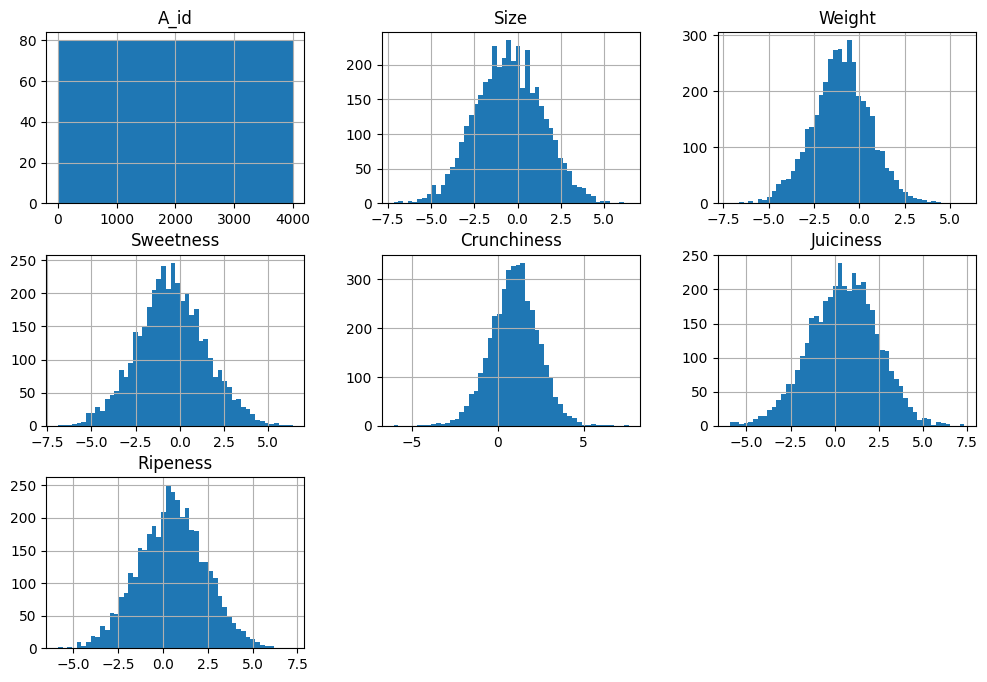

In [119]:
import matplotlib.pyplot as plt
apples.hist(bins=50,figsize=(12,8))
plt.show()

In [120]:
def clean_data(apples):
    
    apples = apples.drop(columns=['A_id'])
    
    apples = apples.dropna()
    
    apples = apples.astype({'Acidity': 'float64'})
    
    def label(Quality):
        if Quality == "good":
            return 0
    
        if Quality == "bad":
            return 1
    
        return None
    
    apples['Label'] = apples['Quality'].apply(label)
    
    apples = apples.drop(columns=['Quality'])
    
    apples = apples.astype({'Label': 'int64'})
    
    return apples

apples_clean = clean_data(apples.copy())
apples_clean.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Label
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,0
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,0
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,1
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,0
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,0


In [121]:
for column in apples.columns:
    num_distinct_values = len(apples[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

A_id: 4000 distinct values
Size: 4000 distinct values
Weight: 4000 distinct values
Sweetness: 4000 distinct values
Crunchiness: 4000 distinct values
Juiciness: 4000 distinct values
Ripeness: 4000 distinct values
Acidity: 4000 distinct values
Quality: 2 distinct values


In [122]:
apples=apples_clean.copy()
corr_matrix = apples_clean.corr(numeric_only=True)
apples.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Label
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,0
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,0
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,1
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,0
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,0


In [123]:
corr_matrix['Label'].sort_values(ascending=False)

Label          1.000000
Ripeness       0.264315
Crunchiness    0.012376
Acidity        0.007697
Weight        -0.001421
Size          -0.244007
Sweetness     -0.250998
Juiciness     -0.260223
Name: Label, dtype: float64

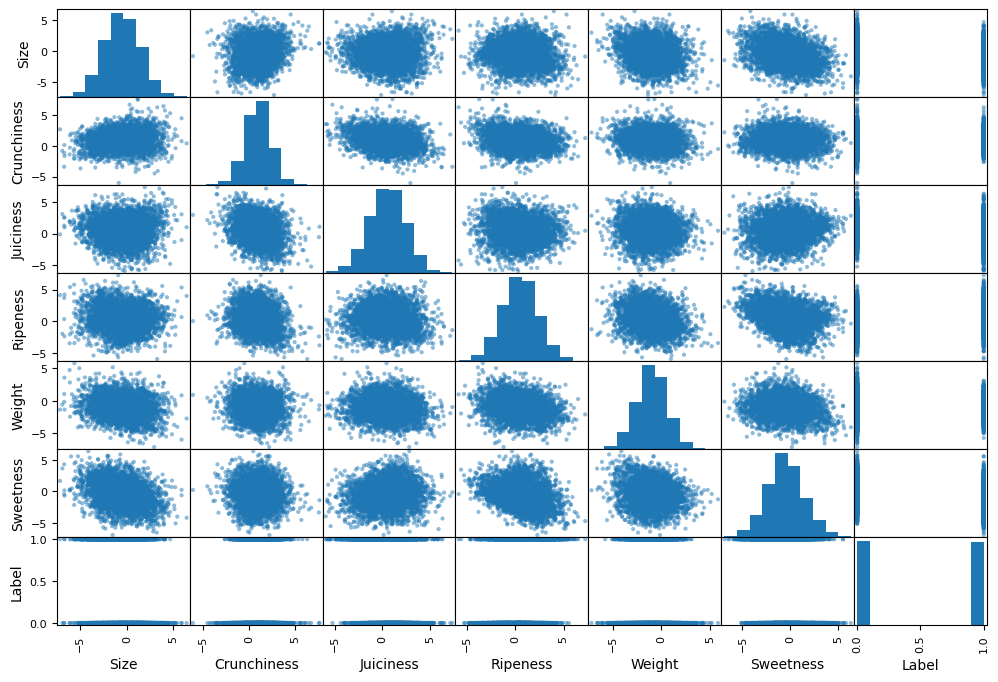

In [124]:
from pandas.plotting import scatter_matrix

attributes = ["Size", "Crunchiness", "Juiciness",
              "Ripeness",'Weight','Sweetness','Label']
scatter_matrix(apples[attributes], figsize=(12, 8))
plt.show()

In [125]:
corr_matrix = apples.corr(numeric_only=True)
corr_matrix['Label'].sort_values(ascending=False)


Label          1.000000
Ripeness       0.264315
Crunchiness    0.012376
Acidity        0.007697
Weight        -0.001421
Size          -0.244007
Sweetness     -0.250998
Juiciness     -0.260223
Name: Label, dtype: float64

In [126]:
apples=apples_clean.copy()

In [127]:
from sklearn.model_selection import train_test_split
import numpy as np
train_set,test_set=train_test_split(apples, test_size=0.2,random_state=42)

In [128]:
apples.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Label
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,0
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,0
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,1
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,0
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,0


In [129]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')

In [130]:
imputer.fit(apples)

SimpleImputer(strategy='median')

In [131]:
X = imputer.transform(apples)

In [132]:
imputer.feature_names_in_

array(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Label'], dtype=object)

In [133]:
from sklearn.preprocessing import MinMaxScaler

In [134]:
min_max_scaler=MinMaxScaler(feature_range=(-1,1))
apples_num_min_max_scaled=min_max_scaler.fit_transform(apples)

In [135]:
apples=apples_clean.drop('Label',axis=1)
apples_label=train_set['Label'].copy()


In [136]:
from sklearn.preprocessing import MinMaxScaler

In [137]:

min_max_scaler=MinMaxScaler(feature_range=(0,1))
apples_scaled=min_max_scaler.fit_transform(apples)


In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Prepare data
X = apples_clean.drop('Label',axis=1)
y = apples_clean['Label'].dropna()  # Ensure target variable has no NaN values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the hyperparameters and their ranges
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Results
best_params, test_accuracy


({'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}, 0.89625)

In [141]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from xgboost import XGBClassifier
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(100, 500),  # Number of trees in the forest
    'max_depth': randint(3, 10),        # Maximum number of levels in each decision tree
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage used in update to prevent overfitting
    # ... you can add more hyperparameters here
}

# Instantiate an XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Instantiate the RandomizedSearchCV object
xgb_cv = RandomizedSearchCV(xgb, param_dist, n_iter=10, scoring='accuracy', cv=5, random_state=42)

# Fit it to the data
xgb_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned XGB Parameters: {}".format(xgb_cv.best_params_))
print("Best score is {}".format(xgb_cv.best_score_))

# Perform cross validation with the best estimator
cv_scores = cross_val_score(xgb_cv.best_estimator_, X, y, cv=5)

# Print cross-validation score mean
print("Cross-validation score mean: {}".format(cv_scores.mean()))


Tuned XGB Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 448}
Best score is 0.8957499999999999
Cross-validation score mean: 0.8957499999999999


In [142]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
svc = SVC(probability=True)

# Define the hyperparameters and their ranges
param_grid = {
    'C': [0.1, 1, 10],                 # Regularization parameter
    'gamma': [1, 0.1, 0.01],           # Kernel coefficient
    'kernel': ['rbf', 'poly', 'sigmoid'] # Specifies the kernel type to be used in the algorithm
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(svc, param_grid, scoring='accuracy', cv=5)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate Accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_model, X, y, cv=5)

# Print results
print("Best parameters:", best_params)
print("Test set accuracy:", accuracy)
print("Test set F1 score:", f1)
print("Cross-validation accuracy mean:", cv_scores.mean())
